In [2]:
import os
import requests
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

True

In [ ]:
INPUT_FILE_PATH = "./data/sample_pdf.pdf"

In [ ]:
os.getenv("UPSTAGE_API_KEY")

'up_OMvypl5e5dS32C7sIWJRhGyb9hh5w'

In [5]:
api_key = os.getenv("UPSTAGE_API_KEY")
filename = INPUT_FILE_PATH

url = "https://api.upstage.ai/v1/document-ai/document-parse"
headers = {"Authorization": f"Bearer {api_key}"}
files = {"document": open(filename, "rb")}
data = {
    "output_formats": "['html', 'text', 'markdown']"
}  # in case you need both text and html
response = requests.post(url, headers=headers, files=files, data=data)
print(response.json())

{'api': '2.0', 'content': {'html': '<header id=\'0\' style=\'font-size:14px\'>2020 한국자동차공학회</header>\n<br><header id=\'1\' style=\'font-size:14px\'>Copyright ⓒ 2020 KSAE<br>20AKSAE_A004</header>\n<h1 id=\'2\' style=\'font-size:20px\'>회귀분석법을 이용한 차량 오일펌프의 인로터 중량 최적화 해석<br>정대근1)* 김기태1)<br>명화공업1)</h1>\n<h1 id=\'3\' style=\'font-size:22px\'>In-rotor weight optimization analysis of vehicle oil pump using regression<br>analysis method</h1>\n<p id=\'4\' data-category=\'paragraph\' style=\'font-size:18px\'>Dae-geun Jung1) Ki-Tae Kim1)</p>\n<p id=\'5\' data-category=\'paragraph\' style=\'font-size:14px\'>1) MYUNGHWA IND. CO., LTD. R&D Center 65, Beojigi-ro, Danwon-gu, Ansan-si, Gyeonggi-do, Korea</p>\n<p id=\'6\' data-category=\'paragraph\' style=\'font-size:16px\'>A bstract : This white paper contains information on techniques that can reduce design time. In this study, multiple regression<br>analysis was used as a method to increase work efficiency. The vane, in-rotor of the vehicle oil pump w

In [ ]:
from pprint import pprint

# Assuming response.json() returns a dictionary with a key 'elements'
data = response.json().get("elements", [])

# Filtering elements where 'page' is 1
filtered_elements = [element for element in data if element.get("page") == 1]

# Pretty-print the filtered elements
pprint(filtered_elements)

[{'category': 'header',
  'content': {'html': "<header id='0' style='font-size:14px'>2020 "
                      '한국자동차공학회</header>',
              'markdown': '2020 한국자동차공학회',
              'text': '2020 한국자동차공학회'},
  'coordinates': [{'x': 0.0882, 'y': 0.045},
                  {'x': 0.2806, 'y': 0.045},
                  {'x': 0.2806, 'y': 0.0603},
                  {'x': 0.0882, 'y': 0.0603}],
  'id': 0,
  'page': 1},
 {'category': 'header',
  'content': {'html': "<br><header id='1' style='font-size:14px'>Copyright ⓒ "
                      '2020 KSAE<br>20AKSAE_A004</header>',
              'markdown': 'Copyright ⓒ 2020 KSAE\n20AKSAE_A004',
              'text': 'Copyright ⓒ 2020 KSAE\n20AKSAE_A004'},
  'coordinates': [{'x': 0.7408, 'y': 0.0322},
                  {'x': 0.9136, 'y': 0.0322},
                  {'x': 0.9136, 'y': 0.0598},
                  {'x': 0.7408, 'y': 0.0598}],
  'id': 1,
  'page': 1},
 {'category': 'heading1',
  'content': {'html': "<h1 id='2' style='font-si

In [ ]:
pprint(response.json()["content"]["markdown"])

('2020 한국자동차공학회\n'
 '\n'
 'Copyright ⓒ 2020 KSAE\n'
 '20AKSAE_A004\n'
 '\n'
 '# 회귀분석법을 이용한 차량 오일펌프의 인로터 중량 최적화 해석\n'
 '정대근1)* 김기태1)\n'
 '명화공업1)\n'
 '\n'
 '# In-rotor weight optimization analysis of vehicle oil pump using '
 'regression\n'
 'analysis method\n'
 '\n'
 'Dae-geun Jung1) Ki-Tae Kim1)\n'
 '\n'
 '1) MYUNGHWA IND. CO., LTD. R&D Center 65, Beojigi-ro, Danwon-gu, Ansan-si, '
 'Gyeonggi-do, Korea\n'
 '\n'
 'A bstract : This white paper contains information on techniques that can '
 'reduce design time. In this study, multiple regression\n'
 'analysis was used as a method to increase work efficiency. The vane, '
 'in-rotor of the vehicle oil pump was selected. Variables that\n'
 'can be optimized for weight were selected during design. It has 5 '
 'independent variables and 3 factors, which was analyzed by\n'
 'multiple regression. Based on this data, the "Macro" automation sheet was '
 'built. As a result of comparing the opimization\n'
 'program and CAE in this paper, the reliab

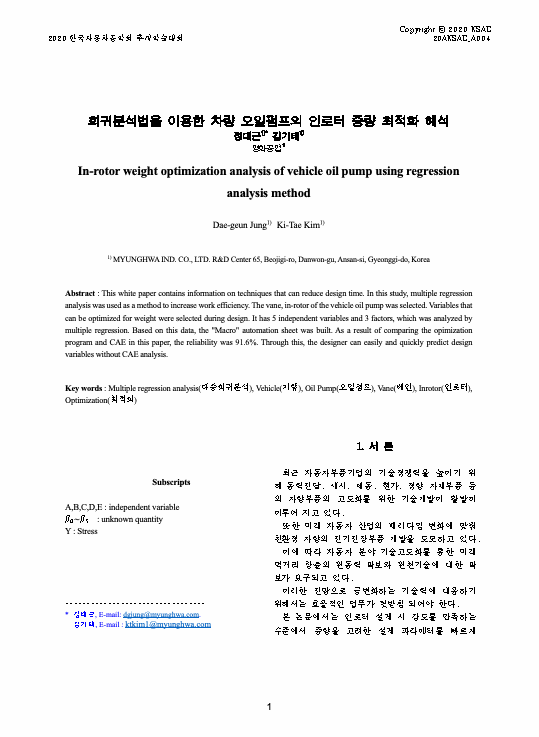

In [ ]:
import pymupdf
import pdfplumber

page = pdfplumber.open(INPUT_FILE_PATH).pages[0]
page.to_image()

In [ ]:
type(page)

pdfplumber.page.Page

In [ ]:
from PIL import Image
import pdfplumber


def pdf_to_image(pdf_file, page_num, dpi=300):
    """
    PDF 파일의 특정 페이지를 이미지로 변환하는 메서드

    :param page_num: 변환할 페이지 번호 (1부터 시작)
    :param dpi: 이미지 해상도 (기본값: 300)
    :return: 변환된 이미지 객체
    """
    with pdfplumber.open(pdf_file) as doc:
        page = doc.pages[page_num]
        target_page_size = [page.width, page.height]
        page_img = Image.frombytes("RGB", target_page_size, page.to_image())
    return page_img

In [27]:
from PIL import Image
import pdfplumber


def pdf_to_image(pdf_file, page_num, dpi=300):
    """
    PDF 파일의 특정 페이지를 이미지로 변환하는 메서드

    :param pdf_file: PDF 파일 경로 또는 파일 객체
    :param page_num: 변환할 페이지 번호 (0부터 시작)
    :param dpi: 이미지 해상도 (기본값: 300)
    :return: 변환된 PIL 이미지 객체
    """
    with pdfplumber.open(pdf_file) as doc:
        page = doc.pages[page_num]  # page_num should be 0-based
        page_img = page.to_image(resolution=dpi).original  # Get PIL Image

    return page_img

In [28]:
# def pdf_to_image(pdf_file, page_num, dpi=300):
#     """
#     PDF 파일의 특정 페이지를 이미지로 변환하는 메서드

#     :param page_num: 변환할 페이지 번호 (1부터 시작)
#     :param dpi: 이미지 해상도 (기본값: 300)
#     :return: 변환된 이미지 객체
#     """
#     with pymupdf.open(pdf_file) as doc:
#         page = doc[page_num].get_pixmap(dpi=dpi)
#         target_page_size = [page.width, page.height]
#         page_img = Image.frombytes("RGB", target_page_size, page.samples)
#     return page_img

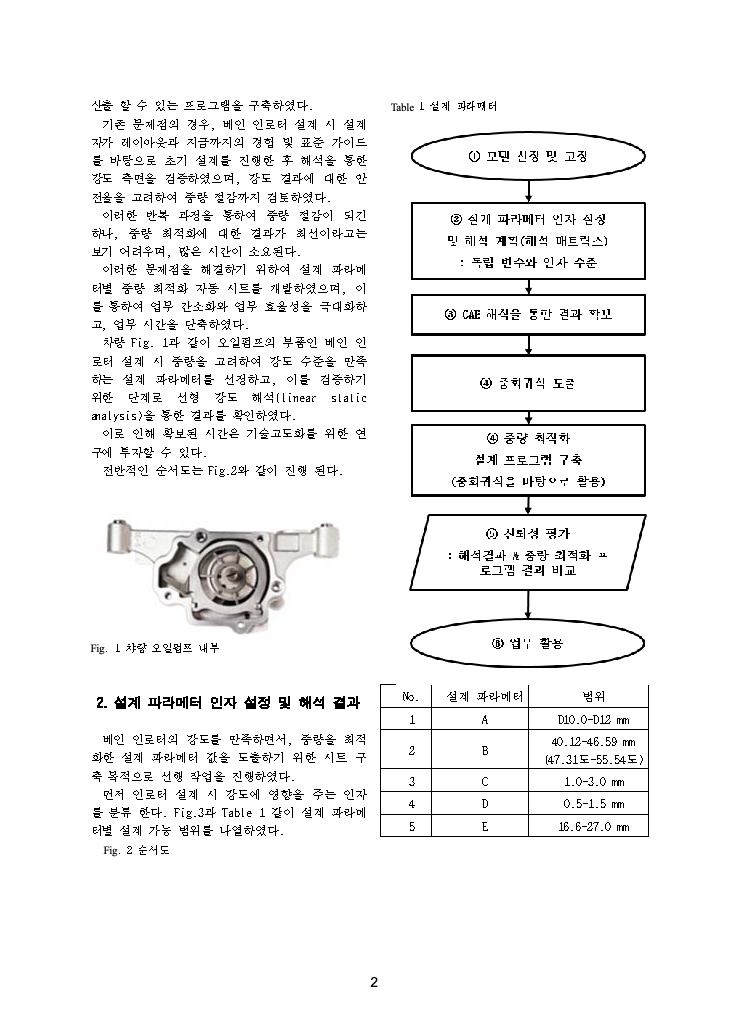

In [30]:
pdf_to_image(INPUT_FILE_PATH, 1, 100)

In [37]:
import pdfplumber
from pypdf import PdfWriter
import os
import pypdf
from pypdf import PdfReader


def split_pdf(filepath, batch_size=10):
    """
    `pypdf`를 사용하여 PDF를 batch_size 단위로 분할하는 함수 (원본 PDF 유지)

    :param filepath: PDF 파일 경로
    :param batch_size: 한 파일당 최대 페이지 수
    :return: 분할된 PDF 파일 경로 목록
    """
    ret = []

    with PdfReader(filepath) as input_pdf:
        num_pages = len(input_pdf.pages)
        print(f"총 페이지 수: {num_pages}")

        for start_page in range(0, num_pages, batch_size):
            end_page = min(start_page + batch_size, num_pages)

            # 새로운 PDF 파일명 생성
            input_file_basename = os.path.splitext(filepath)[0]
            output_file = f"{input_file_basename}_{start_page:04d}_{end_page-1:04d}.pdf"
            print(f"분할 PDF 생성: {output_file}")

            # 새로운 PDF 파일 생성
            writer = PdfWriter()
            for page_num in range(start_page, end_page):
                writer.add_page(
                    input_pdf.pages[page_num]
                )  # 원본 PDF 페이지 추가

            with open(output_file, "wb") as f:
                writer.write(f)

            ret.append(output_file)

    return ret


# 테스트 실행
split_files = split_pdf(INPUT_FILE_PATH, batch_size=5)
print("생성된 파일들:", split_files)

총 페이지 수: 6
분할 PDF 생성: ./data/sample_pdf_0000_0004.pdf
분할 PDF 생성: ./data/sample_pdf_0005_0005.pdf
생성된 파일들: ['./data/sample_pdf_0000_0004.pdf', './data/sample_pdf_0005_0005.pdf']
